In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'poketest'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

#input_data= '/content/drive/MyDrive/ai_final/'


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,cv2
import random

In [ ]:
def get_images(directory):
    Images=[]
    Labels=[]
    label=0
    
    for labels in os.listdir(directory):
        if labels == 'Zubat':
            label = 0
        elif labels == 'Zapdos':
            label = 1
        elif labels == 'Wigglytuff':
            label = 2
        elif labels == 'Weezing':
            label = 3
        elif labels == 'Weepinbell':
            label = 4
        
        for images_file in os.listdir(directory+labels):
            image=cv2.imread(directory+labels+r'/'+images_file) #read the images
            image=cv2.resize(image,(150,150))
            Images.append(image)
            Labels.append(label)
    
    #return random.shuffle(Images,Labels)
    return Images,Labels


In [ ]:
def get_classlabel(class_code):
    labels={0:'Zubat',1:'Zapdos',2:'Wigglytuff',3:'Weezing',4:'Weepinbell'}
    return labels[class_code]

In [ ]:
Images,Labels=get_images('/content/drive/My Drive/poketest/')
Images=np.array(Images)
Labels=np.array(Labels)
    

In [ ]:
permutation = np.random.permutation(Labels.shape[0])
shuffled_Images =Images[permutation, :, :, :]
shuffled_Labels =Labels[permutation]

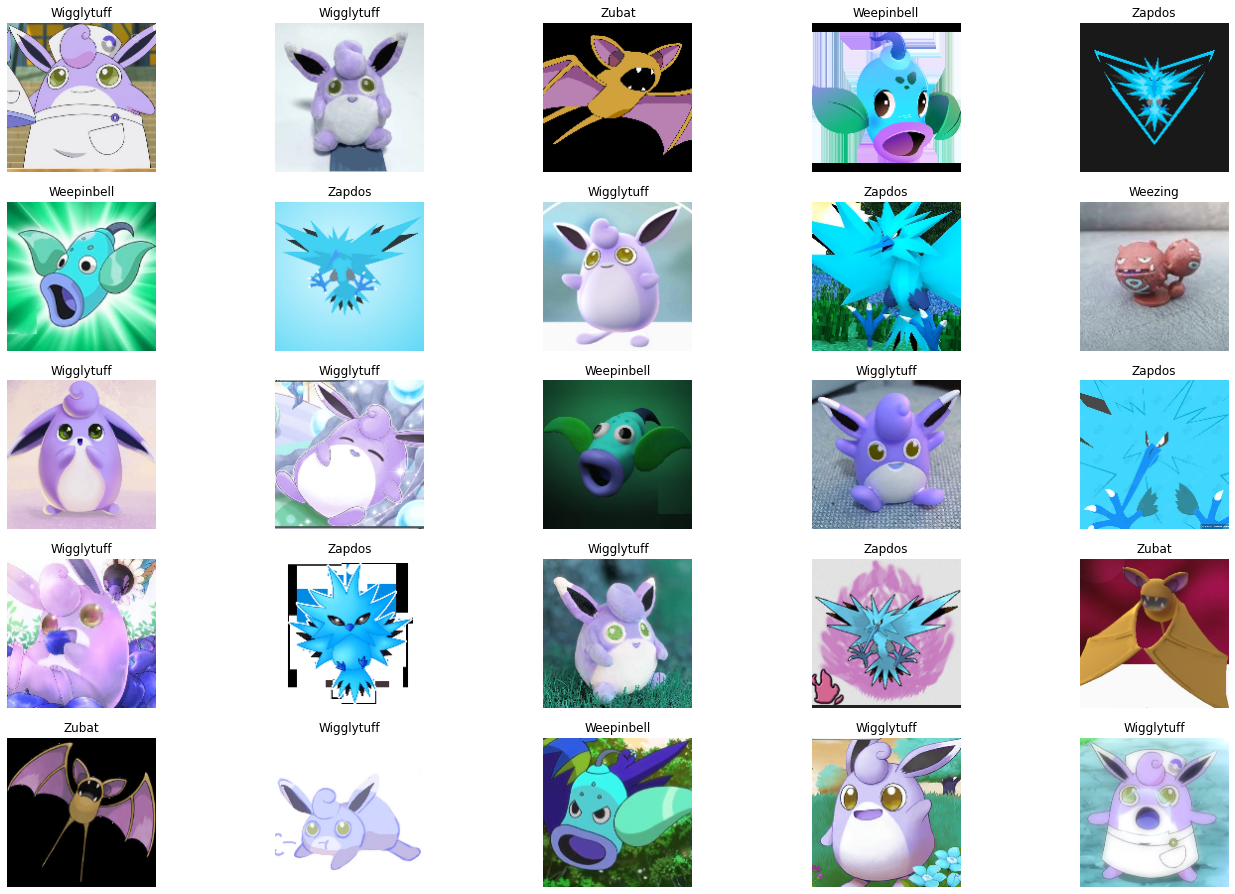

In [ ]:
f,ax=plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
  for j in range(0,5,1):
    rnd_number=random.randint(0,len(Images))
    ax[i,j].imshow(Images[rnd_number])
    ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
    ax[i,j].axis('off')

In [ ]:
print(Images.shape)
print(Labels.shape)
print(type(Images))
print(type(Labels))

(400, 150, 150, 3)
(400,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**First model**

In [ ]:
model = Sequential()

model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 200)     5600      
                                                                 
 conv2d_15 (Conv2D)          (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 29, 29, 180)      0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 27, 27, 140)       226940    
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 100)       126100    
                                                                 
 conv2d_18 (Conv2D)          (None, 23, 23, 50)        45050     
                                                      

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
trained=model.fit(Images,Labels,epochs=10,batch_size=32,validation_split=0.3)

Epoch 1/10
9/9 [==============================] - 279s 31s/step - loss: 6.7980 - acc: 0.2107 - val_loss: 3.6713 - val_acc: 0.0083
Epoch 2/10
9/9 [==============================] - 275s 31s/step - loss: 1.6351 - acc: 0.2964 - val_loss: 2.5024 - val_acc: 0.0000e+00
Epoch 3/10
9/9 [==============================] - 269s 30s/step - loss: 1.3054 - acc: 0.4107 - val_loss: 3.8828 - val_acc: 0.0083
Epoch 4/10
9/9 [==============================] - 268s 30s/step - loss: 1.1011 - acc: 0.4929 - val_loss: 4.2902 - val_acc: 0.0500
Epoch 5/10
9/9 [==============================] - 271s 31s/step - loss: 0.9787 - acc: 0.5786 - val_loss: 3.5294 - val_acc: 0.0833
Epoch 6/10
9/9 [==============================] - 268s 30s/step - loss: 0.8594 - acc: 0.6821 - val_loss: 4.7293 - val_acc: 0.1083
Epoch 7/10
9/9 [==============================] - 268s 30s/step - loss: 0.7792 - acc: 0.6964 - val_loss: 3.8965 - val_acc: 0.0917
Epoch 8/10
9/9 [==============================] - 268s 30s/step - loss: 0.7208 - acc: 

In [ ]:
trained=model.fit(shuffled_Images,shuffled_Labels,epochs=10,batch_size=32,validation_split=0.3)

Epoch 1/10
9/9 [==============================] - 287s 31s/step - loss: 1.4657 - acc: 0.5643 - val_loss: 1.1421 - val_acc: 0.4833
Epoch 2/10
9/9 [==============================] - 269s 30s/step - loss: 1.0208 - acc: 0.5607 - val_loss: 0.7603 - val_acc: 0.6000
Epoch 3/10
9/9 [==============================] - 269s 30s/step - loss: 0.8533 - acc: 0.6286 - val_loss: 0.7876 - val_acc: 0.6083
Epoch 4/10
9/9 [==============================] - 274s 31s/step - loss: 0.7645 - acc: 0.6929 - val_loss: 0.5785 - val_acc: 0.8000
Epoch 5/10
9/9 [==============================] - 270s 30s/step - loss: 0.6268 - acc: 0.7464 - val_loss: 0.5730 - val_acc: 0.8167
Epoch 6/10
9/9 [==============================] - 269s 30s/step - loss: 0.5914 - acc: 0.7821 - val_loss: 0.4545 - val_acc: 0.8333
Epoch 7/10
9/9 [==============================] - 269s 30s/step - loss: 0.6581 - acc: 0.7679 - val_loss: 0.5465 - val_acc: 0.8833
Epoch 8/10
9/9 [==============================] - 268s 30s/step - loss: 0.4544 - acc: 0.81

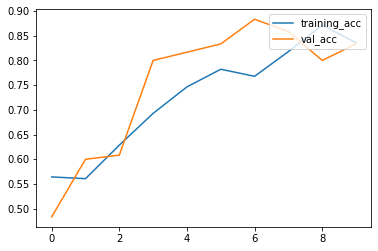

In [ ]:
#plot model acc
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['acc'],label='training_acc')
plt.plot(trained.history['val_acc'],label='val_acc')
plt.legend(loc='upper right')
plt.show()
plt.close()

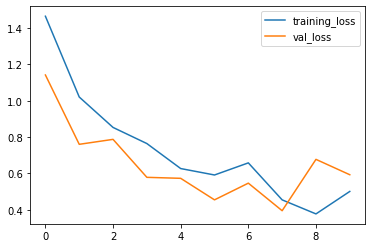

In [ ]:
#plot model loss
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['loss'],label='training_loss')
plt.plot(trained.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:
test_images,test_labels=get_images('/content/drive/My Drive/poketest2/')
test_images=np.array(test_images)
test_labels=np.array(test_labels)
model.evaluate(test_images,test_labels,verbose=1)



**Second model**


*   learning_rate改為0.0001
*   batch_size改為64
*   輸出層activation改為softmax






In [ ]:
model = Sequential()

model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 200)     5600      
                                                                 
 conv2d_6 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 180)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 140)       226940    
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 100)       126100    
                                                                 
 conv2d_9 (Conv2D)           (None, 23, 23, 50)        45050     
                                                      

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
trained=model.fit(Images,Labels,epochs=10,batch_size=64,validation_split=0.3)

Epoch 1/10
5/5 [==============================] - 277s 55s/step - loss: 3.5515 - acc: 0.3500 - val_loss: 4.6264 - val_acc: 0.0083
Epoch 2/10
5/5 [==============================] - 269s 54s/step - loss: 1.8212 - acc: 0.3143 - val_loss: 4.4611 - val_acc: 0.1167
Epoch 3/10
5/5 [==============================] - 268s 53s/step - loss: 1.4353 - acc: 0.4286 - val_loss: 4.0364 - val_acc: 0.0083
Epoch 4/10
5/5 [==============================] - 268s 53s/step - loss: 1.0436 - acc: 0.5286 - val_loss: 3.7302 - val_acc: 0.0667
Epoch 5/10
5/5 [==============================] - 267s 53s/step - loss: 1.0672 - acc: 0.5071 - val_loss: 3.7330 - val_acc: 0.0667
Epoch 6/10
5/5 [==============================] - 266s 53s/step - loss: 0.9168 - acc: 0.6036 - val_loss: 3.6285 - val_acc: 0.1167
Epoch 7/10
5/5 [==============================] - 266s 53s/step - loss: 0.7660 - acc: 0.6857 - val_loss: 3.9288 - val_acc: 0.1083
Epoch 8/10
5/5 [==============================] - 276s 56s/step - loss: 0.7171 - acc: 0.70

In [ ]:
#plot model acc
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['acc'],label='training_acc')
plt.plot(trained.history['val_acc'],label='val_acc')
plt.legend(loc='upper right')
plt.show()
plt.close()

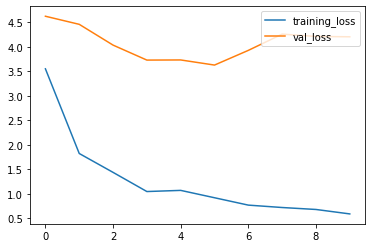

In [ ]:
#plot model loss
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['loss'],label='training_loss')
plt.plot(trained.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:
test_images,test_labels=get_images('/content/drive/My Drive/poketest2/')
test_images=np.array(test_images)
test_labels=np.array(test_labels)
model.evaluate(test_images,test_labels,verbose=1)


**Third model**



*   Conv2D改為６層




In [ ]:
model = Sequential()

model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer,loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
trained=model.fit(Images,Labels,epochs=10,batch_size=64,validation_split=0.3)

In [ ]:
#plot model acc
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['acc'],label='training_acc')
plt.plot(trained.history['val_acc'],label='valacc')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:
#plot model loss
plt.rcParams['figure.figsize']=(6,4)
plt.plot(trained.history['loss'],label='training_loss')
plt.plot(trained.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:
test_images,test_labels=get_images('/content/drive/My Drive/poketest2/')
test_images=np.array(test_images)
test_labels=np.array(test_labels)
model.evaluate(test_images,test_labels,verbose=1)

**比較三種方式：**